# Project 2: Trees and Calibration


## Instructions

Please push the .ipynb, .py, and .pdf to Github Classroom prior to the deadline. Please include your UNI as well.

**Make sure to use the dataset that we provide in CourseWorks/Classroom. DO NOT download it from the link provided (It may be different).**

Due Date : 03/02 (2nd March), 11:59 PM EST

## Name: Eshan Kumar

## UNI: ek3227

## The Dataset
Credit ([Link](https://www.kaggle.com/gamersclub/brazilian-csgo-plataform-dataset-by-gamers-club?select=tb_lobby_stats_player.csv) | [License](https://creativecommons.org/licenses/by-nc-sa/4.0/))

The goal is to predict wins based on in match performace of multiple players. Please use this dataset and this task for all parts of the assignment.

### Features

idLobbyGame - Categorical (The Lobby ID for the game)

idPlayer - Categorical (The ID of the player)

idRooom - Categorical (The ID of the room)

qtKill - Numerical (Number of kills)

qtAssist - Numerical (Number of Assists)

qtDeath - Numerical (Number of Deaths)

qtHs - Numerical (Number of kills by head shot)

qtBombeDefuse - Numerical (Number of Bombs Defuses)

qtBombePlant - Numerical (Number of Bomb plants)

qtTk - Numerical (Number of Team kills)

qtTkAssist - Numerical Number of team kills assists)

qt1Kill - Numerical (Number of rounds with one kill)

qt2Kill - Numerical (Number of rounds with two kill)

qt3Kill - Numerical (Number of rounds with three kill)

qt4Kill - Numerical (Number of rounds with four kill)

qt5Kill - Numerical (Number of rounds with five kill)

qtPlusKill - Numerical (Number of rounds with more than one kill)

qtFirstKill - Numerical (Number of rounds with first kill)

vlDamage - Numerical (Total match Damage)

qtHits - Numerical (Total match hits)

qtShots - Numerical (Total match shots)

qtLastAlive - Numerical (Number of rounds being last alive)

qtClutchWon - Numerical (Number of total clutchs wons)

qtRoundsPlayed - Numerical (Number of total Rounds Played)

descMapName - Categorical (Map Name - de_mirage, de_inferno, de_dust2, de_vertigo, de_overpass, de_nuke, de_train, de_ancient)

vlLevel - Numerical (GC Level)

qtSurvived - Numerical (Number of rounds survived)

qtTrade - Numerical (Number of trade kills)

qtFlashAssist - Numerical (Number of flashbang assists)

qtHitHeadshot - Numerical (Number of times the player hit headshot

qtHitChest - Numerical (Number of times the player hit chest)

qtHitStomach - Numerical (Number of times the player hit stomach)

qtHitLeftAtm - Numerical (Number of times the player hit left arm)

qtHitRightArm - Numerical (Number of times the player hit right arm)

qtHitLeftLeg - Numerical (Number of times the player hit left leg)

qtHitRightLeg - Numerical (Number of times the player hit right leg)

flWinner - Winner Flag (**Target Variable**).

dtCreatedAt - Date at which this current row was added. (Date)


## Question 1: Decision Trees

**1.1: Load the provided dataset**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
playerDF = pd.read_csv('tb_lobby_stats_player.csv')
cat_ft = ['idLobbyGame', 'idPlayer', 'idRoom', 'descMapName', 'flWinner']
num_ft = ['qtKill', 'qtAssist', 'qtDeath', 'qtHs', 'qtBombeDefuse', 'qtBombePlant', 'qtTk', 'qtTkAssist', 'qt1Kill', 'qt2Kill', 'qt3Kill', 'qt4Kill', 'qt5Kill', 'qtPlusKill', 'qtFirstKill', 'vlDamage', 'qtHits', 'qtShots', 'qtLastAlive', 'qtClutchWon', 'qtRoundsPlayed', 'vlLevel', 'qtSurvived', 'qtTrade', 'qtFlashAssist', 'qtHitHeadshot', 'qtHitChest', 'qtHitStomach', 'qtHitLeftAtm', 'qtHitRightArm', 'qtHitLeftLeg', 'qtHitRightLeg']
playerDF.head(5)


,idLobbyGame,idPlayer,idRoom,qtKill,qtAssist,qtDeath,qtHs,qtBombeDefuse,qtBombePlant,qtTk,...,qtFlashAssist,qtHitHeadshot,qtHitChest,qtHitStomach,qtHitLeftAtm,qtHitRightArm,qtHitLeftLeg,qtHitRightLeg,flWinner,dtCreatedAt
0,1,1,1,5,1,16,2,0,0,0.0,...,0.0,3.0,13.0,4.0,2.0,2.0,1.0,0.0,0,2022-01-21 19:45:44
1,2,1,2,24,3,18,6,0,4,0.0,...,0.0,7.0,26.0,14.0,2.0,1.0,1.0,3.0,1,2022-02-04 02:09:47
2,3,2,3,6,4,23,2,0,1,0.0,...,0.0,3.0,15.0,8.0,1.0,2.0,0.0,2.0,0,2021-09-18 18:07:43
3,3,391,27508,10,5,20,4,1,0,0.0,...,0.0,6.0,27.0,10.0,1.0,7.0,6.0,6.0,1,2021-09-18 18:07:43
4,4,2,4,8,4,26,6,0,2,0.0,...,2.0,8.0,19.0,12.0,2.0,3.0,2.0,5.0,0,2021-09-27 00:17:45


**1.2: Plot % of missing values in each column. Would you consider dropping any columns? Assuming we want to train a decision tree, would you consider imputing the missing values? If not, why? (Remove the columns that you consider dropping - you must remove the dtCreatedAt column)**

In [3]:
missing_df = playerDF.loc[playerDF.isnull().any(axis=1)]
display(missing_df.head(5))
nRows = len(playerDF)
print("Percentage of N/A in:")
filt_playerDF = playerDF.copy()

# Finding missing values and imputing them
for column in playerDF:
    nNull = playerDF[column].isna().sum()
    percentNull = (float(nNull)/nRows)*100
    # If find Columns with null values, prints name of columns and percent null
    if nNull:
        print("%s:\t\t%.3f" %(column, percentNull))
        if column in cat_ft: # For categorical, fill with mode (most common category)
            imputed = playerDF[column].mode()
        else: # For Continuous features, fill with mean
            imputed = playerDF[column].mean()
        filt_playerDF[column] = playerDF[column].fillna(imputed)

print("\nI would not drop any columns because none of them have a high percentage of values that are NaN. Removing an entire column for a few NaN values would sacrifice a lot of potentially useful data.")
print("We are using a decision tree, which can handle missing variables, but we can also impute these values using the mean of numeric features and the mode for categorical features for the sake of thoroughness")
filt_playerDF = filt_playerDF.drop(columns=['dtCreatedAt'])
display(filt_playerDF.head(5))

# Double Check that no rows have Null values
missing_df = filt_playerDF.loc[filt_playerDF.isnull().any(axis=1)]
display(missing_df.head(5))

,idLobbyGame,idPlayer,idRoom,qtKill,qtAssist,qtDeath,qtHs,qtBombeDefuse,qtBombePlant,qtTk,...,qtFlashAssist,qtHitHeadshot,qtHitChest,qtHitStomach,qtHitLeftAtm,qtHitRightArm,qtHitLeftLeg,qtHitRightLeg,flWinner,dtCreatedAt
428,396,10,396,13,5,26,9,0,1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2021-11-04 20:26:02
429,397,10,397,20,2,20,12,0,1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2021-11-04 21:25:14
435,402,10,402,21,1,23,13,0,2,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2021-11-06 01:33:23
446,412,10,412,21,3,23,10,0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2021-11-08 22:47:40
447,413,10,413,34,4,22,21,0,1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2021-11-09 00:12:28


Percentage of N/A in:
qtTk:		0.065
qtTkAssist:		0.065
qtHits:		0.065
qtLastAlive:		0.065
qtSurvived:		0.383
qtTrade:		0.383
qtFlashAssist:		0.383
qtHitHeadshot:		0.383
qtHitChest:		0.383
qtHitStomach:		0.383
qtHitLeftAtm:		0.383
qtHitRightArm:		0.383
qtHitLeftLeg:		0.383
qtHitRightLeg:		0.383

I would not drop any columns because none of them have a high percentage of values that are NaN. Removing an entire column for a few NaN values would sacrifice a lot of potentially useful data.
We are using a decision tree, which can handle missing variables, but we can also impute these values using the mean of numeric features and the mode for categorical features for the sake of thoroughness


,idLobbyGame,idPlayer,idRoom,qtKill,qtAssist,qtDeath,qtHs,qtBombeDefuse,qtBombePlant,qtTk,...,qtTrade,qtFlashAssist,qtHitHeadshot,qtHitChest,qtHitStomach,qtHitLeftAtm,qtHitRightArm,qtHitLeftLeg,qtHitRightLeg,flWinner
0,1,1,1,5,1,16,2,0,0,0.0,...,2.0,0.0,3.0,13.0,4.0,2.0,2.0,1.0,0.0,0
1,2,1,2,24,3,18,6,0,4,0.0,...,1.0,0.0,7.0,26.0,14.0,2.0,1.0,1.0,3.0,1
2,3,2,3,6,4,23,2,0,1,0.0,...,3.0,0.0,3.0,15.0,8.0,1.0,2.0,0.0,2.0,0
3,3,391,27508,10,5,20,4,1,0,0.0,...,4.0,0.0,6.0,27.0,10.0,1.0,7.0,6.0,6.0,1
4,4,2,4,8,4,26,6,0,2,0.0,...,4.0,2.0,8.0,19.0,12.0,2.0,3.0,2.0,5.0,0


,idLobbyGame,idPlayer,idRoom,qtKill,qtAssist,qtDeath,qtHs,qtBombeDefuse,qtBombePlant,qtTk,...,qtTrade,qtFlashAssist,qtHitHeadshot,qtHitChest,qtHitStomach,qtHitLeftAtm,qtHitRightArm,qtHitLeftLeg,qtHitRightLeg,flWinner


**1.3: Plot side-by-side bars of class distribtuion for each category for the categorical feature and the target categories.**

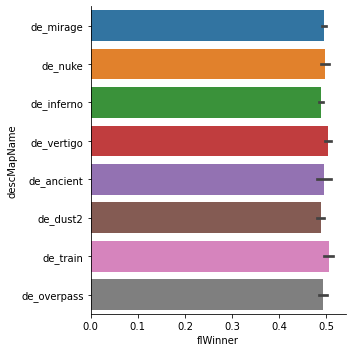

In [4]:
sns.catplot(x='flWinner', y='descMapName', kind="bar", data=filt_playerDF)

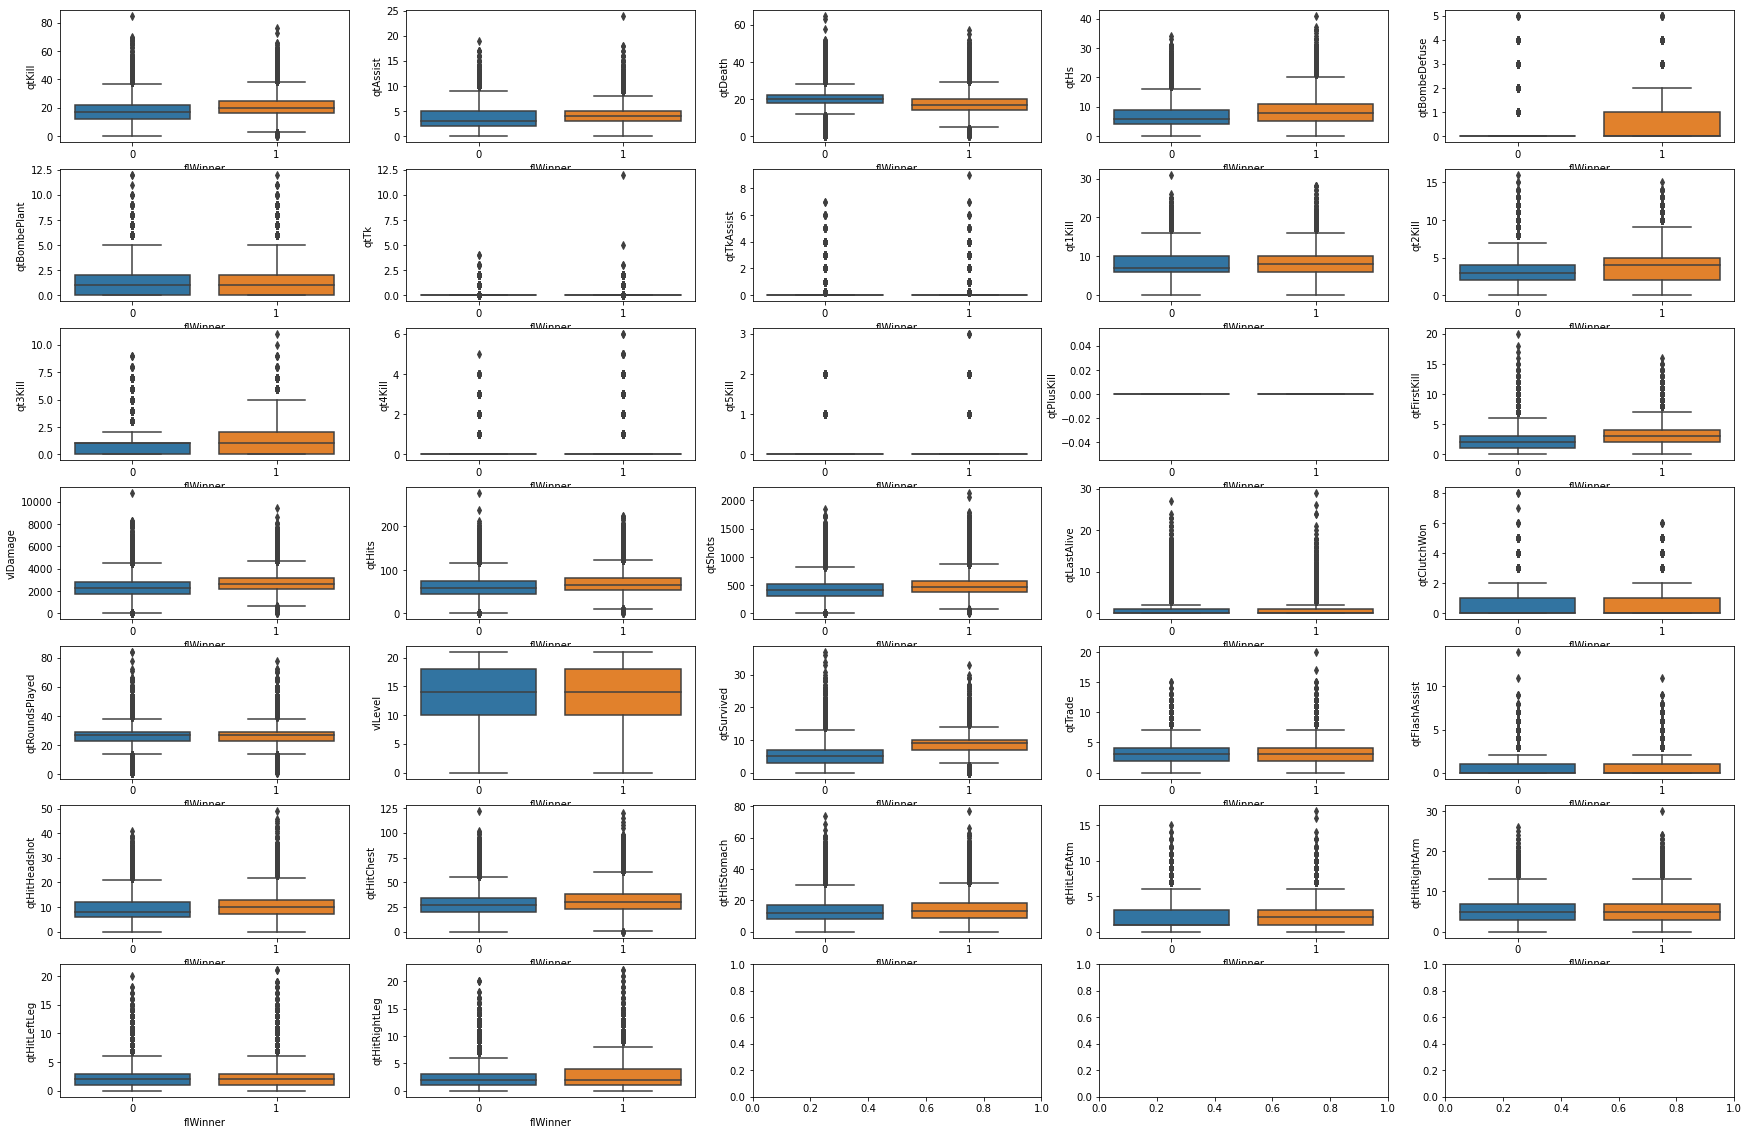

In [5]:
#Also plotting these simply to visualize
figure, axes = plt.subplots(7, 5, figsize = (30, 20))
for index, feature in enumerate(num_ft):
    xval = int(index/5)
    yval = index%5
    sns.boxplot(x='flWinner',y=feature, data=filt_playerDF, ax=axes[xval,yval])

**1.4: Split the data into development and test datasets. Which splitting methodology did you choose and why?**

In [6]:
# Split data into features and labels
player_X = filt_playerDF.drop(columns=['flWinner', 'idLobbyGame','idPlayer', 'idRoom'])
player_y = filt_playerDF['flWinner']
print(player_X.columns)

Index(['qtKill', 'qtAssist', 'qtDeath', 'qtHs', 'qtBombeDefuse',
       'qtBombePlant', 'qtTk', 'qtTkAssist', 'qt1Kill', 'qt2Kill', 'qt3Kill',
       'qt4Kill', 'qt5Kill', 'qtPlusKill', 'qtFirstKill', 'vlDamage', 'qtHits',
       'qtShots', 'qtLastAlive', 'qtClutchWon', 'qtRoundsPlayed',
       'descMapName', 'vlLevel', 'qtSurvived', 'qtTrade', 'qtFlashAssist',
       'qtHitHeadshot', 'qtHitChest', 'qtHitStomach', 'qtHitLeftAtm',
       'qtHitRightArm', 'qtHitLeftLeg', 'qtHitRightLeg'],
      dtype='object')


In [98]:
# Train-test split
from sklearn.model_selection import train_test_split
pre_X_dev, pre_X_test, y_dev, y_test = train_test_split(player_X, player_y, test_size = 0.2, random_state=42)
print("\nTrain-test split")
print("Shape of training data\nX_train:\t" + str(pre_X_dev.shape) + "\ny_train:\t" + str(y_dev.shape))
print("\nShape of test data\nX_test:\t\t" + str(pre_X_test.shape) + "\ny_test:\t\t" + str(y_test.shape))
print("\nI chose to split the data 80% Training and 20% Test, because this is a common split percentage")


Train-test split
Shape of training data
X_train:	(147321, 33)
y_train:	(147321,)

Shape of test data
X_test:		(36831, 33)
y_test:		(36831,)

I chose to split the data 80% Training and 20% Test, because this is a common split percentage


**1.5: Preprocess the data (Handle the Categorical Variable). Do we need to apply scaling? Briefly Justify**

In [8]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
# Fit one hot encoder to X_dev (because X_test is smaller, it may be missing data of some category, 
#one hot encoding on each individually would cause shape mismatch)
enc.fit(pre_X_dev[['descMapName']])

# For categorical feature, one hot encode
X_dev_cat = enc.transform(pre_X_dev[['descMapName']]).toarray()
X_dev_num = pre_X_dev.drop(columns = ['descMapName'])

X_test_cat = enc.transform(pre_X_test[['descMapName']]).toarray()
X_test_num = pre_X_test.drop(columns = ['descMapName'])

catColNames = list(enc.get_feature_names_out())
numColNames = list(X_dev_num.columns.values)
colNames = numColNames + catColNames

#Put categorical and numerical features back together again
X_dev_num = X_dev_num.to_numpy()
X_dev = pd.DataFrame(np.concatenate((X_dev_num, X_dev_cat), axis=1), columns = colNames)
X_test_num = X_test_num.to_numpy()
X_test = pd.DataFrame(np.concatenate((X_test_num, X_test_cat), axis=1), columns = colNames)

display(X_dev.head(5))
print("One hot encoding:")
print("Shape of data before one-hot encoding:\t" + str(pre_X_dev.shape))
print("Shape of data after one-hot encoding:\t" + str(X_dev.shape))
print("\nBecause Decision Trees are invariant to the scale of data, we do not need to apply scaling to the continuous features")

,qtKill,qtAssist,qtDeath,qtHs,qtBombeDefuse,qtBombePlant,qtTk,qtTkAssist,qt1Kill,qt2Kill,...,qtHitLeftLeg,qtHitRightLeg,descMapName_de_ancient,descMapName_de_dust2,descMapName_de_inferno,descMapName_de_mirage,descMapName_de_nuke,descMapName_de_overpass,descMapName_de_train,descMapName_de_vertigo
0,24.0,4.0,19.0,10.0,1.0,1.0,0.0,0.0,3.0,7.0,...,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,14.0,7.0,19.0,5.0,0.0,1.0,0.0,0.0,7.0,2.0,...,3.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,18.0,3.0,21.0,5.0,0.0,0.0,0.0,0.0,8.0,5.0,...,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,15.0,5.0,12.0,4.0,0.0,0.0,0.0,1.0,6.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,23.0,5.0,22.0,5.0,0.0,2.0,0.0,0.0,9.0,7.0,...,4.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


One hot encoding:
Shape of data before one-hot encoding:	(147321, 33)
Shape of data after one-hot encoding:	(147321, 40)

Because Decision Trees are invariant to the scale of data, we do not need to apply scaling to the continuous features


**1.6: Fit a Decision Tree on the development data until all leaves are pure. What is the performance of the tree on the development set and test set? Provide metrics you believe are relevant and briefly justify.**

In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

#Train decision tree classifier, overfits on development set
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_dev, y_dev)

print(classifier.score(X_dev, y_dev))
print(classifier.score(X_test, y_test))

1.0
0.7294127229779263


**1.7: Visualize the trained tree until the max_depth 8**

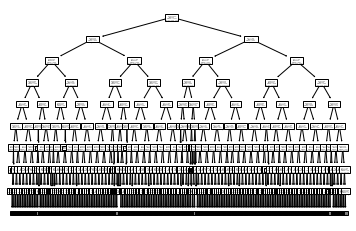

In [10]:
from sklearn import tree
# Tree is too deep, needs pruning
_ = tree.plot_tree(classifier, max_depth = 8)

**1.8: Prune the tree using one of the techniques discussed in class and evaluate the performance**

In [11]:
# Prune by training with alpha values
path = classifier.cost_complexity_pruning_path(X_dev, y_dev)
alphas = path['ccp_alphas']
print(alphas)
print("Because there are ", len(alphas), " alpha values, instead of pruning the tree using every alpha, we will select 20 of them and determine which yields the best performance on the test set.")

[0.00000000e+00 3.38700868e-06 3.38999362e-06 ... 1.50614353e-02
 4.04362996e-02 1.21288982e-01]
Because there are  9554  alpha values, instead of pruning the tree using every alpha, we will select 20 of them and determine which yields the best performance on the test set.


[0.0, 6.430640716887831e-06, 6.6493699929724495e-06, 9.050531379323608e-06, 9.050531379323608e-06, 1.018184780173906e-05, 1.0343464433512696e-05, 1.0860637655188328e-05, 1.1313164224154512e-05, 1.1791382965897814e-05, 1.2118626572777715e-05, 1.253150498675576e-05, 1.3090947173664504e-05, 1.4480850206917774e-05, 1.5903076566525764e-05, 1.7221868281798633e-05, 1.856043537062276e-05, 2.028091635305747e-05, 2.2808288432333877e-05, 2.824242134105771e-05]


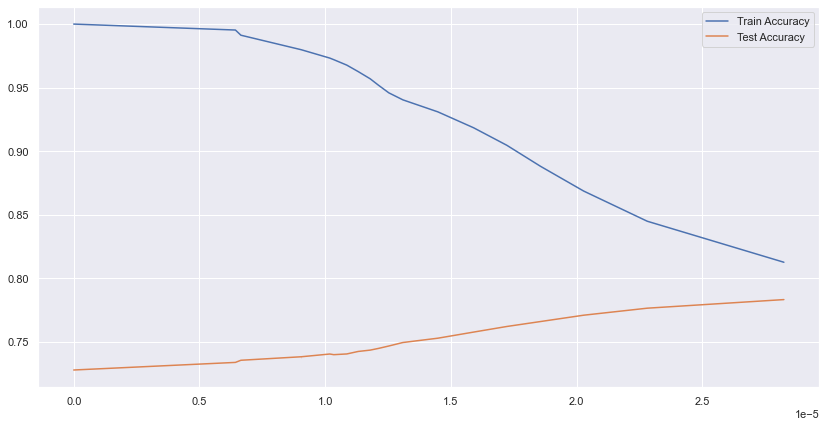

In [146]:
numAlphas = 20
jump = len(alphas)/numAlphas

trainScores = []
testScores = []

alphaSpace = [alphas[int(i*jump)] for i in range(20)]

print(alphaSpace)

bestTest = 0
for alpha in alphaSpace:
    # Train new tree with alpha, will prune away nodes
    tree = DecisionTreeClassifier(ccp_alpha = alpha)
    tree.fit(X_dev, y_dev)
    
    trainScores.append(tree.score(X_dev, y_dev))
    testScore = tree.score(X_test, y_test)
    testScores.append(testScore)
    if testScore > bestTest:
        bestTree = tree
        bestTest = testScore
        
# on high level - to to pick which feature/branch to split on, in order to do that need to compute the information gain
# compute IG across all features - alpha is threshold - pick top two features to split on - 
# kind of like threshold to choose what features to split on

# Even though train accuracy lowers, Test Accuracy is greater
sns.set()
plt.figure(figsize = (14, 7))
sns.lineplot(y=trainScores, x = alphaSpace, label="Train Accuracy")
sns.lineplot(y=testScores, x = alphaSpace, label="Test Accuracy")
plt.show()

In [13]:
print("It seems that as we prune the tree, it overfits less and the accuracy on the test data improves.")

It seems that as we prune the tree, it overfits less and the accuracy on the test data improves.


**1.9: List the top 3 most important features for this trained tree? How would you justify these features being the most important?**

It seems that the three most important features are qtSurvived (Number of Rounds Survived), qtDeath(Number of Deaths), and qtTrade(Number of Trade Kills)
It makes sense that if a player survives more rounds he will win, so this is why this is the most important feature for the tree, and thus the strongest predictor for winning. The qtDeath also makes sense because even though a player is dying, it means he is being more active, and directing opponent player attention towards himself, away from potentially better players who can win the game. qtTrade also makes sense because if a player gets a trade kill, it means he must be a skilled active player, meaning that it is more likely for him to win. 


/Users/eshankumar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


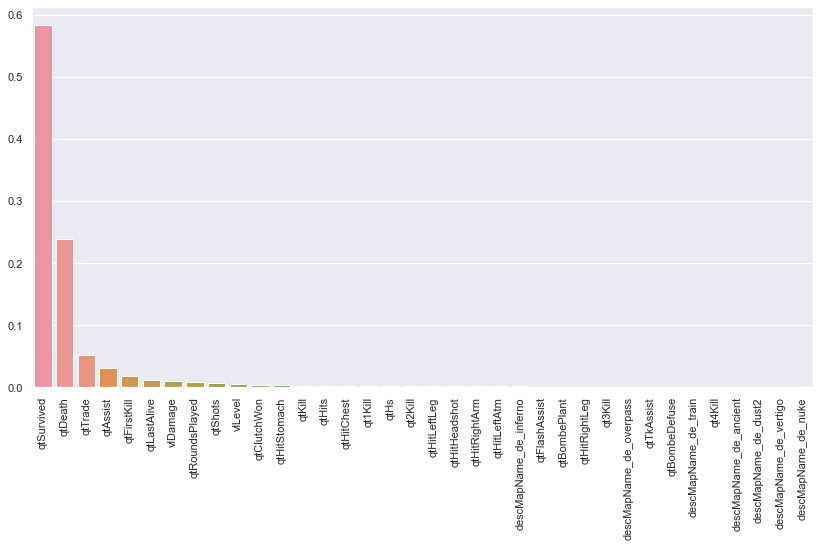

In [14]:
#slide 341
feat_imps = zip(colNames, bestTree.feature_importances_)
feats, imps = zip(*(sorted(list(filter(lambda x: x[1] != 0, feat_imps)), key = lambda x: x[1], reverse = True)))
plt.figure(figsize = (14, 7))
ax = sns.barplot(list(feats), list(imps))
ax.tick_params(axis='x', rotation=90)

print("It seems that the three most important features are qtSurvived (Number of Rounds Survived), qtDeath(Number of Deaths), and qtTrade(Number of Trade Kills)")
print("It makes sense that if a player survives more rounds he will win, so this is why this is the most important feature for the tree, and thus the strongest predictor for winning. The qtDeath also makes sense because even though a player is dying, it means he is being more active, and directing opponent player attention towards himself, away from potentially better players who can win the game. qtTrade also makes sense because if a player gets a trade kill, it means he must be a skilled active player, meaning that it is more likely for him to win. ")

## Question 2: Random Forests

**2.1: Train a Random Forest model on the development dataset using RandomForestClassifier class in sklearn. Use the default parameters. Evaluate the performance of the model on test dataset. Does this perform better than Decision Tree on the test dataset (compare to results in Q 1.6)?**

In [15]:
from sklearn.ensemble import RandomForestClassifier
RFclf = RandomForestClassifier()
RFclf.fit(X_dev, y_dev)
print("Training Data Score: ", RFclf.score(X_dev, y_dev))
print("Training Data Score: ", RFclf.score(X_test, y_test))
print("This random forest performs better than the Decision Tree on the test dataset, likely because it is an esemble method.")

Training Data Score:  0.999972848405862
Training Data Score:  0.788086123102821
This random forest performs better than the Decision Tree on the test dataset, likely because it is an esemble method.


**2.2: Does all trees in the trained random forest model have pure leaves? How would you verify this?**

In [16]:
print("Yes, the random forest model has all trees with pure leaves. We know this because the Random Forest was instantiated with default parameters, so when max_depth and min_samples is default, the nodes are expanded until all leaves are pure.")
print("This is according to sklearn: https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html")

trees = RFclf.estimators_

#Iterate through every tree in forest
for tree in trees:
    n_nodes = tree.tree_.node_count
    children_left = tree.tree_.children_left
    children_right = tree.tree_.children_right
    impurity = tree.tree_.impurity
    feature = tree.tree_.feature
    threshold = tree.tree_.threshold
    
    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    
    stack = [0] 
    while len(stack) > 0:
        node_id = stack.pop()
        is_split_node = children_left[node_id] != children_right[node_id] #Child nodes will have these ==
        
        # If a split node, append left and right children and depth to `stack`
        # so we can loop through them
        if children_left[node_id] != children_right[node_id]:
            stack.append(children_left[node_id])
            stack.append(children_right[node_id])
        else:
            #If leaf node, check that impurity == 0
            if impurity[node_id] != 0:
                raise Exception("Error, node has nonzero impurity. node_id = " + str(node_id))

print("\nSuccessfully verified that all leaves have impurity of 0")


Yes, the random forest model has all trees with pure leaves. We know this because the Random Forest was instantiated with default parameters, so when max_depth and min_samples is default, the nodes are expanded until all leaves are pure.
This is according to sklearn: https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

Successfully verified that all leaves have impurity of 0


**2.3: Assume you want to improve the performance of this model. Also, assume that you had to pick two hyperparameters that you could tune to improve its performance. Which hyperparameters would you choose and why?**

In [17]:
print("I would choose to tune the hyperparameters of Number of Estimators and ccp_alpha. This is because currently, the tree seems to be overfitting. Perhaps by increasing the number of estimators, or by pruning the trees more, we can decrease this problem.")

I would choose to tune the hyperparameters of Number of Estimators and ccp_alpha. This is because currently, the tree seems to be overfitting. Perhaps by increasing the number of estimators, or by pruning the trees more, we can decrease this problem.


**2.4: Now, assume you had to choose up to 5 different values (each) for these two hyperparameters. How would you choose these values that could potentially give you a performance lift?**

In [18]:
print("For number of estimators, I would traverse linear space from 100-500 (or random between some range). For ccp_alpha, I would choose values in the same range as the single tree above. I would perhaps even narrow the range in the direction that I saw performance improvement, between 2.82e-5 to 0.12.")
# go with linspace for ccp_alphas


For number of estimators, I would traverse linear space from 100-500 (or random between some range). For ccp_alpha, I would choose values in the same range as the single tree above. I would perhaps even narrow the range in the direction that I saw performance improvement, between 2.82e-5 to 0.12.


**2.5: Perform model selection using the chosen values for the hyperparameters. Use cross-validation for finding the optimal hyperparameters. Report on the optimal hyperparameters. Estimate the performance of the optimal model (model trained with optimal hyperparameters) on test dataset? Has the performance improved over your plain-vanilla random forest model trained in Q2.1?**

In [19]:
from sklearn.model_selection import GridSearchCV

forestAlphas = [alphas[int(x)-1] for x in np.linspace(int((len(alphas)*19)/20), len(alphas), 4)]
estimators = [int(x) for x in np.linspace(50, 150, 3)]

#Grid searching with given hyperparameter space
pipe = make_pipeline(GridSearchCV(RandomForestClassifier(), param_grid = {"n_estimators":estimators, "ccp_alpha":forestAlphas[:3]}, cv=5, verbose=5))
pipe.fit(X_dev, y_dev)
grid_search_results = pipe.named_steps["gridsearchcv"]
print(f"Best Score:\t", grid_search_results.best_score_)
print(f"Best Params:\t", grid_search_results.best_params_)
print(f"Test Score:\t", pipe.score(X_test, y_test))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ccp_alpha=2.818538328259185e-05, n_estimators=50;, score=0.789 total time=  27.5s
[CV 2/5] END ccp_alpha=2.818538328259185e-05, n_estimators=50;, score=0.791 total time=  28.5s
[CV 3/5] END ccp_alpha=2.818538328259185e-05, n_estimators=50;, score=0.789 total time=  28.3s
[CV 4/5] END ccp_alpha=2.818538328259185e-05, n_estimators=50;, score=0.791 total time=  28.1s
[CV 5/5] END ccp_alpha=2.818538328259185e-05, n_estimators=50;, score=0.789 total time=  28.2s
[CV 1/5] END ccp_alpha=2.818538328259185e-05, n_estimators=100;, score=0.790 total time=  56.3s
[CV 2/5] END ccp_alpha=2.818538328259185e-05, n_estimators=100;, score=0.790 total time=  56.3s
[CV 3/5] END ccp_alpha=2.818538328259185e-05, n_estimators=100;, score=0.789 total time=  56.6s
[CV 4/5] END ccp_alpha=2.818538328259185e-05, n_estimators=100;, score=0.792 total time=  56.5s
[CV 5/5] END ccp_alpha=2.818538328259185e-05, n_estimators=100;, score=0.789 tota

**2.6: Can you find the top 3 most important features from the model trained in Q2.5? How do these features compare to the important features that you found from Q1.9? If they differ, which feature set makes more sense?**

/Users/eshankumar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


The top 2 features remain the same, but the third feature, Rounds played, makes more sense. This is because it makes sense that if a player played for more rounds overall, they would likely be better at the game so would have a higher probability of winning.


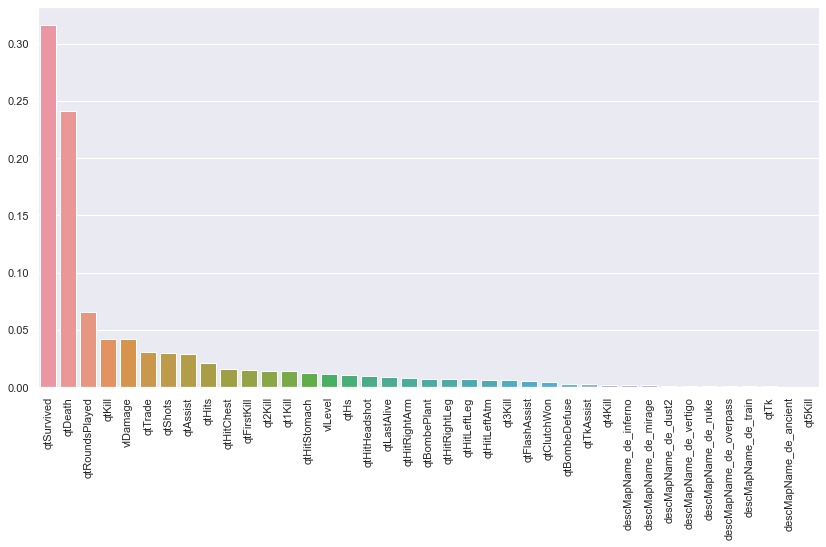

In [21]:
bestForest = grid_search_results.best_estimator_

feat_imps = zip(colNames, bestForest.feature_importances_)
feats, imps = zip(*(sorted(list(filter(lambda x: x[1] != 0, feat_imps)), key = lambda x: x[1], reverse = True)))
plt.figure(figsize = (14, 7))
ax = sns.barplot(list(feats), list(imps))
ax.tick_params(axis='x', rotation=90)

print("The top 2 features remain the same, but the third feature, Rounds played, makes more sense. This is because it makes sense that if a player played for more rounds overall, they would likely be better at the game so would have a higher probability of winning.")

## Question 3: Gradient Boosted Trees

**3.1: Choose three hyperparameters to tune GradientBoostingClassifier and HistGradientBoostingClassifier on the development dataset using 5-fold cross validation. Report on the time taken to do model selection for both the models. Also, report the performance of the test dataset from the optimal models.**

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
import random
import itertools
learning_rate = list(np.logspace(-5, -1, 5))
max_iter = estimators = [int(x) for x in np.linspace(50, 150, 5)]
reg_lambda = l2_regularization = min_impurity_decrease = list(np.linspace(0, 0.5, 5))

#Instead of creating hyperparameter search space and manually randomly selecting hyperparams to train, can use RandomizedSearchCV
#hparamSearchSpace = list(set(itertools.product(estimators , learning_rate, min_impurity_decrease)))
#rand_hParams = random.sample(hparamSearchSpace, 8)

In [20]:
# Experimentally, Randomized Search has been shown to be better than Grid Search, and even many informed search strategies
from sklearn.model_selection import RandomizedSearchCV
pipe = make_pipeline(RandomizedSearchCV(GradientBoostingClassifier(), param_distributions = {"n_estimators":estimators, "learning_rate":learning_rate, "min_impurity_decrease": min_impurity_decrease}, n_iter = 8, cv=5, verbose=5))
pipe.fit(X_dev, y_dev)
rand_search_results = pipe.named_steps["randomizedsearchcv"]
bestGradForest = rand_search_results.best_estimator_
print(f"Best Score:\t", rand_search_results.best_score_)
print(f"Best Params:\t", rand_search_results.best_params_)
print(f"Test Score:\t", pipe.score(X_test, y_test))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END learning_rate=1e-05, min_impurity_decrease=0.5, n_estimators=75;, score=0.506 total time=  19.8s
[CV 2/5] END learning_rate=1e-05, min_impurity_decrease=0.5, n_estimators=75;, score=0.506 total time=  18.9s
[CV 3/5] END learning_rate=1e-05, min_impurity_decrease=0.5, n_estimators=75;, score=0.506 total time=  18.8s
[CV 4/5] END learning_rate=1e-05, min_impurity_decrease=0.5, n_estimators=75;, score=0.506 total time=  19.1s
[CV 5/5] END learning_rate=1e-05, min_impurity_decrease=0.5, n_estimators=75;, score=0.506 total time=  19.0s
[CV 1/5] END learning_rate=0.01, min_impurity_decrease=0.0, n_estimators=150;, score=0.771 total time=  37.9s
[CV 2/5] END learning_rate=0.01, min_impurity_decrease=0.0, n_estimators=150;, score=0.772 total time=  38.2s
[CV 3/5] END learning_rate=0.01, min_impurity_decrease=0.0, n_estimators=150;, score=0.772 total time=  39.4s
[CV 4/5] END learning_rate=0.01, min_impurity_decrease=0.0, 

In [21]:
from sklearn.ensemble import HistGradientBoostingClassifier
pipe = make_pipeline(RandomizedSearchCV(HistGradientBoostingClassifier(), param_distributions = {"max_iter":max_iter, "learning_rate":learning_rate, "l2_regularization": l2_regularization}, n_iter = 8, cv=5, verbose=5))
pipe.fit(X_dev, y_dev)
rand_search_results = pipe.named_steps["randomizedsearchcv"]
bestHistGradForest = rand_search_results.best_estimator_
print(f"Best Score:\t", rand_search_results.best_score_)
print(f"Best Params:\t", rand_search_results.best_params_)
print(f"Test Score:\t", pipe.score(X_test, y_test))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END l2_regularization=0.25, learning_rate=0.1, max_iter=100;, score=0.802 total time=   2.3s
[CV 2/5] END l2_regularization=0.25, learning_rate=0.1, max_iter=100;, score=0.802 total time=   2.6s
[CV 3/5] END l2_regularization=0.25, learning_rate=0.1, max_iter=100;, score=0.801 total time=   2.2s
[CV 4/5] END l2_regularization=0.25, learning_rate=0.1, max_iter=100;, score=0.803 total time=   2.4s
[CV 5/5] END l2_regularization=0.25, learning_rate=0.1, max_iter=100;, score=0.801 total time=   2.2s
[CV 1/5] END l2_regularization=0.0, learning_rate=1e-05, max_iter=150;, score=0.506 total time=   3.9s
[CV 2/5] END l2_regularization=0.0, learning_rate=1e-05, max_iter=150;, score=0.506 total time=   3.4s
[CV 3/5] END l2_regularization=0.0, learning_rate=1e-05, max_iter=150;, score=0.506 total time=   3.5s
[CV 4/5] END l2_regularization=0.0, learning_rate=1e-05, max_iter=150;, score=0.506 total time=   3.4s
[CV 5/5] END l2_re

**3.2: Train an XGBoost model by tuning 3 hyperparameters using 5 fold cross-validation. Compare the performance of the trained XGBoost model on the test dataset against the performances obtained from 3.1**

In [62]:
# To use XGBoost need to download using https://discuss.xgboost.ai/t/xgboost-on-apple-m1/2004/9
import xgboost
from xgboost import XGBClassifier
pipe = make_pipeline(RandomizedSearchCV(XGBClassifier(use_label_encoder=False), param_distributions = {"n_estimators":estimators, "learning_rate":learning_rate, "reg_lambda": reg_lambda}, n_iter = 8, cv=5, verbose=5))
pipe.fit(X_dev, y_dev)
rand_search_results = pipe.named_steps["randomizedsearchcv"]
bestXGBoost = rand_search_results.best_estimator_
print(f"Best Score:\t", rand_search_results.best_score_)
print(f"Best Params:\t", rand_search_results.best_params_)
print(f"Test Score:\t", pipe.score(X_test, y_test))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END learning_rate=1e-05, n_estimators=125, reg_lambda=0.125;, score=0.776 total time=  28.0s
[CV 2/5] END learning_rate=1e-05, n_estimators=125, reg_lambda=0.125;, score=0.777 total time=  27.7s
[CV 3/5] END learning_rate=1e-05, n_estimators=125, reg_lambda=0.125;, score=0.775 total time=  28.4s
[CV 4/5] END learning_rate=1e-05, n_estimators=125, reg_lambda=0.125;, score=0.779 total time=  27.7s
[CV 5/5] END learning_rate=1e-05, n_estimators=125, reg_lambda=0.125;, score=0.777 total time=  27.6s
[CV 1/5] END learning_rate=0.001, n_estimators=100, reg_lambda=0.5;, score=0.777 total time=  22.0s
[CV 2/5] END learning_rate=0.001, n_estimators=100, reg_lambda=0.5;, score=0.781 total time=  22.2s
[CV 3/5] END learning_rate=0.001, n_estimators=100, reg_lambda=0.5;, score=0.776 total time=  22.3s
[CV 4/5] END learning_rate=0.001, n_estimators=100, reg_lambda=0.5;, score=0.780 total time=  22.2s
[CV 5/5] END learning_rate=0.0

**3.3: Compare the results on the test dataset from XGBoost, HistGradientBoostingClassifier, GradientBoostingClassifier with results from Q1.6 and Q2.1. Which model tends to perform the best and which one does the worst? How big is the difference between the two? Which model would you choose among these 5 models and why?**

Decision Tree
	Score: 0.7834161440091227
Random Forest
	Score: 0.7912084
Gradient Boosting Classifier
	Score: 0.7972903260840053
Hist Gradient Boosting Classifier
	Score: 0.8020417583014309
XGBoost
	Score: 0.800982867692976


/Users/eshankumar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


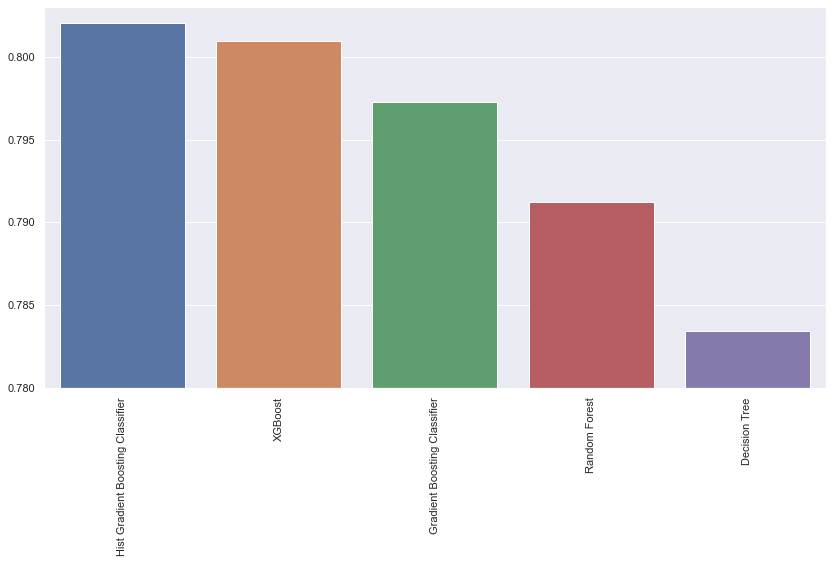

In [50]:
modelNames = ['Decision Tree', 'Random Forest', 'Gradient Boosting Classifier', 'Hist Gradient Boosting Classifier', 'XGBoost']
scores = [bestTree.score(X_test, y_test), 0.7912084, bestGradForest.score(X_test, y_test), bestHistGradForest.score(X_test, y_test), bestXGBoost.score(X_test, y_test)]

model_scores = zip(modelNames, scores)
x = zip(modelNames, scores)
    
modelNames, scores = zip(*(sorted(list(filter(lambda x: x[1] != 0, model_scores)), key = lambda x: x[1], reverse = True)))
plt.figure(figsize = (14, 7))
ax = sns.barplot(list(modelNames), list(scores))
ax.tick_params(axis='x', rotation=90)
ax.set(ylim=(0.78, 0.803))

for model, score in x:
    print(model + "\n\tScore: " + str(score))

**3.4: Can you list the top 3 features from the trained XGBoost model? How do they differ from the features found from Random Forest and Decision Tree? Which one would you trust the most?**

/Users/eshankumar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


The top 2 features remain the same, but the third feature, qtTrade, is the same as the Decision Tree, and differs from the Random Forest. It ranks Survived as much higher. I would trust this XGBoost model the most because it has the highest test score.


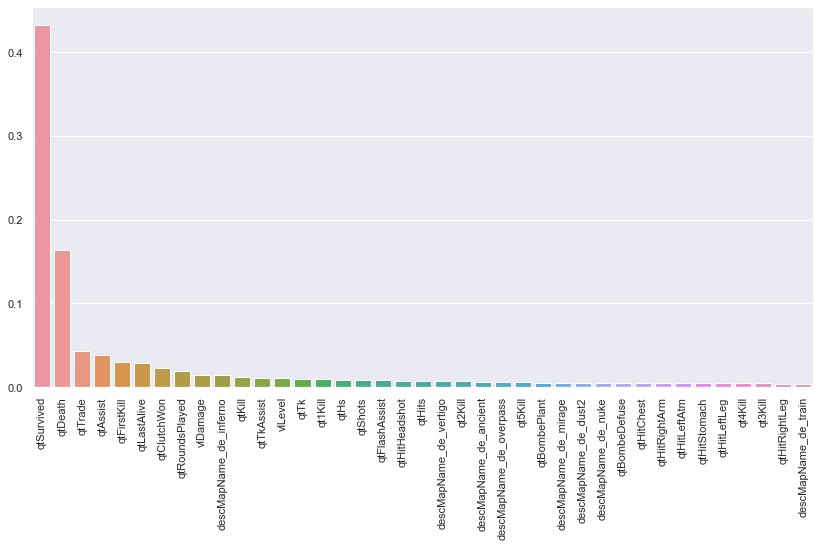

In [51]:
feat_imps = zip(colNames, bestXGBoost.feature_importances_)
feats, imps = zip(*(sorted(list(filter(lambda x: x[1] != 0, feat_imps)), key = lambda x: x[1], reverse = True)))
plt.figure(figsize = (14, 7))
ax = sns.barplot(list(feats), list(imps))
ax.tick_params(axis='x', rotation=90)

print("The top 2 features remain the same, but the third feature, qtTrade, is the same as the Decision Tree, and differs from the Random Forest. It ranks Survived as much higher. I would trust this XGBoost model the most because it has the highest test score.")

**3.5: Can you choose the top 7 features (as given by feature importances from XGBoost) and repeat Q3.2? Does this model perform better than the one trained in Q3.2? Why or why not is the performance better?**

In [59]:
top7 = list(feats)[:7]
top7_X_dev = X_dev[top7]
top7_X_test = X_test[top7]

pipe = make_pipeline(RandomizedSearchCV(XGBClassifier(use_label_encoder=False), param_distributions = {"n_estimators":estimators, "learning_rate":learning_rate, "reg_lambda": reg_lambda}, n_iter = 8, cv=5, verbose=5))
# Fit classifier with only top 7 features in training
pipe.fit(top7_X_dev, y_dev)
rand_search_results = pipe.named_steps["randomizedsearchcv"]
best7XGBoost = rand_search_results.best_estimator_
print(f"Best Score:\t", rand_search_results.best_score_)
print(f"Best Params:\t", rand_search_results.best_params_)
print(f"Test Score:\t", pipe.score(top7_X_test, y_test))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END learning_rate=0.0001, n_estimators=100, reg_lambda=0.375;, score=0.777 total time=   5.5s
[CV 2/5] END learning_rate=0.0001, n_estimators=100, reg_lambda=0.375;, score=0.777 total time=   5.5s
[CV 3/5] END learning_rate=0.0001, n_estimators=100, reg_lambda=0.375;, score=0.774 total time=   5.5s
[CV 4/5] END learning_rate=0.0001, n_estimators=100, reg_lambda=0.375;, score=0.778 total time=   5.4s
[CV 5/5] END learning_rate=0.0001, n_estimators=100, reg_lambda=0.375;, score=0.777 total time=   5.5s
[CV 1/5] END learning_rate=0.001, n_estimators=100, reg_lambda=0.375;, score=0.777 total time=   5.5s
[CV 2/5] END learning_rate=0.001, n_estimators=100, reg_lambda=0.375;, score=0.781 total time=   5.5s
[CV 3/5] END learning_rate=0.001, n_estimators=100, reg_lambda=0.375;, score=0.775 total time=   5.4s
[CV 4/5] END learning_rate=0.001, n_estimators=100, reg_lambda=0.375;, score=0.779 total time=   5.4s
[CV 5/5] END lear

In [60]:
print("The performance is roughly the same when we use the top 7 features because we removed data and features that were deemed irrelevant to the prediction. Even though we removed a lot of data, by decreasing the amount of noisy, irrelevant data, this allows the model to more easily learn.")

The performance is roughly the same when we use the top 7 features because we removed data and features that were deemed irrelevant to the prediction. Even though we removed a lot of data, by decreasing the amount of noisy, irrelevant data, this allows the model to more easily learn.


## Question 4: Calibration

**4.1: Estimate the brier score for the XGBoost model (trained with optimal hyperparameters from Q3.2) scored on the test dataset.**

Brier Score of XGBoost: 0.12973466512084722


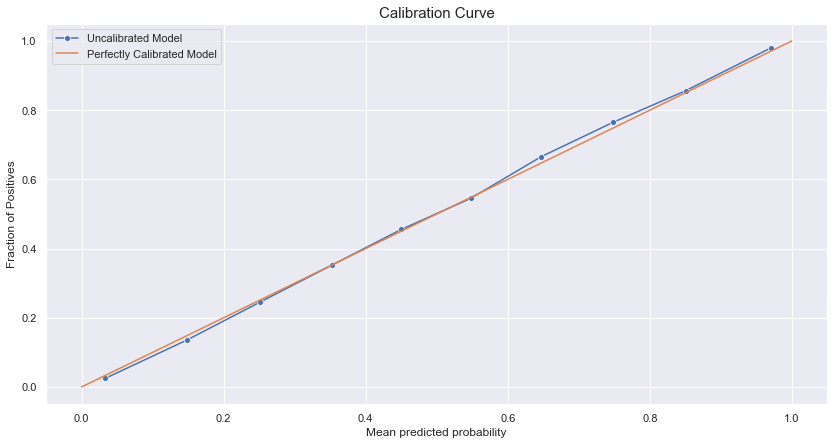

In [128]:
from sklearn.metrics import brier_score_loss
from sklearn.calibration import calibration_curve

# Predict proba returns probabilities instead of 1, 0 labels
y_pred = bestXGBoost.predict_proba(X_test)

#x[1] corresponds to probability of label "1"
y_pred = [x[1] for x in y_pred]

print("Brier Score of XGBoost: " + str(brier_score_loss(y_test, y_pred)))
prob_true, prob_pred = calibration_curve(y_test, y_pred, n_bins=10)

#Manually plotting Calibration Curve
plt.figure(figsize = (14, 7))
sns.lineplot(y= prob_true, x = prob_pred, marker='o', label="Uncalibrated Model")
sns.lineplot(y=[0,1], x =[0,1], dashes = True, label="Perfectly Calibrated Model")
plt.xlabel("Mean predicted probability", fontsize= 12)
plt.ylabel("Fraction of Positives", fontsize= 12)
plt.title("Calibration Curve", fontsize= 15)
plt.show()

**4.2: Calibrate the trained XGBoost model using isotonic regression as well as Platt scaling. Plot predicted v.s. actual on test datasets from both the calibration methods**

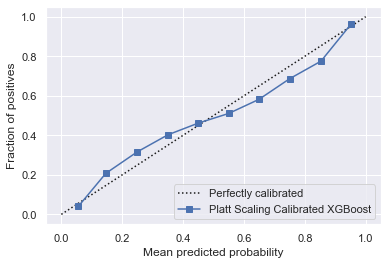

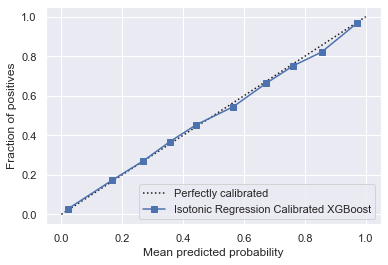

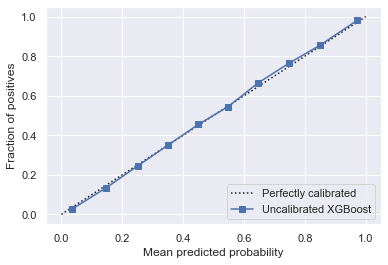

In [134]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import CalibrationDisplay

X_train, X_calib, y_train, y_calib = train_test_split(X_dev, y_dev, test_size=0.2, random_state=42)

platt_cal_XGBoost = CalibratedClassifierCV(bestXGBoost, method='sigmoid', cv="prefit")
platt_cal_XGBoost.fit(X_calib, y_calib)

iso_cal_XGBoost = CalibratedClassifierCV(bestXGBoost, method='isotonic', cv="prefit")
iso_cal_XGBoost.fit(X_calib, y_calib)

display = CalibrationDisplay.from_estimator(platt_cal_XGBoost, X_test, y_test, n_bins=10, name='Platt Scaling Calibrated XGBoost')
display = CalibrationDisplay.from_estimator(iso_cal_XGBoost, X_test, y_test, n_bins=10, name='Isotonic Regression Calibrated XGBoost')
display = CalibrationDisplay.from_estimator(bestXGBoost, X_test, y_test, n_bins=10, name='Uncalibrated XGBoost')

**4.3: Report brier scores from both the calibration methods. Do the calibration methods help in having better predicted probabilities?**

In [145]:
print("Brier Score of Vanilla XGBoost:\t\t\t\t" + str(brier_score_loss(y_test, y_pred)))

platt_y_pred = platt_cal_XGBoost.predict_proba(X_test)
platt_y_pred = [x[1] for x in platt_y_pred]
print("Brier Score of Platt Scaling Calibrated XGBoost:\t" + str(brier_score_loss(y_test, platt_y_pred)))

iso_y_pred = iso_cal_XGBoost.predict_proba(X_test)
iso_y_pred = [x[1] for x in iso_y_pred]
print("Brier Score of Isotonic Regression Calibrated XGBoost:\t" + str(brier_score_loss(y_test, iso_y_pred)))

print("\nIt seems that the calibration methods do not help in having better predicted probabilities, as also seen in the Calibration curves above. However, Isotonic Regression does a better job.")

Brier Score of Vanilla XGBoost:				0.12973466512084722
Brier Score of Platt Scaling Calibrated XGBoost:	0.13189520678440939
Brier Score of Isotonic Regression Calibrated XGBoost:	0.12989887571031405

It seems that the calibration methods do not help in having better predicted probabilities, as also seen in the Calibration curves above. However, Isotonic Regression does a better job.
